# Continuous Optimization with Particle Swarm

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from src.particle_swarm import ParticleSwarmOptimizer

### Define objective and the constraint function.

The constraint function returns False if the constraint is not met and True otherwise (the function is feasible).

In [3]:
def objective(x: np.array) -> float:
    return  np.sin(x[0]**2) + np.sin(x[-1]**2) + np.sin(x[0]) * np.sin(x[-1])

def constraint(x: np.ndarray) -> bool:
    if x[0] * x[-1] > 0.9:
        return False
    return True

### Define the number of dimensions in x and the search range in each dimension

In [4]:
n_dimensions = 2

search_range_x1 = 3
search_range_x2 = 3

min_x = np.array([-search_range_x1, -search_range_x2])
max_x = np.array([search_range_x1, search_range_x2])

### Optimize

In [5]:
t0 = time.time()
# run with constraint
optimizer = ParticleSwarmOptimizer(objective, 'min', n_dimensions, min_x, max_x, n_particles=100, n_iterations=100, constraints=[]) #
optimizer.run()
print("time: ", time.time()-t0)

print('x =', optimizer.get_best_position()[0])
print('y =', optimizer.get_best_position()[-1])
print('obj =', objective(optimizer.get_best_position()))

time:  0.2234327793121338
x = 2.14611960967992
y = -2.146119617406075
obj = -2.6926043886804534


### Plot search history

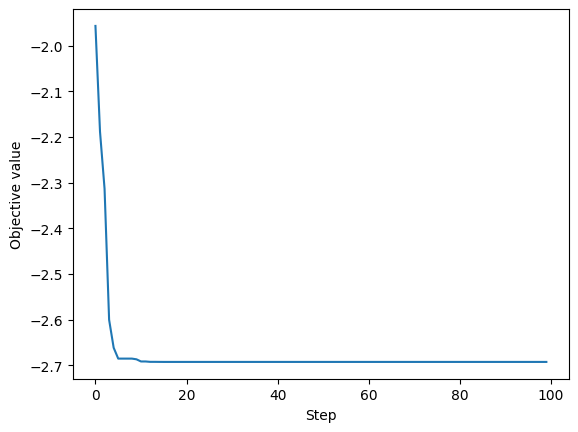

In [6]:
optimizer.plot_search()

### Plot solution in the function (search) space

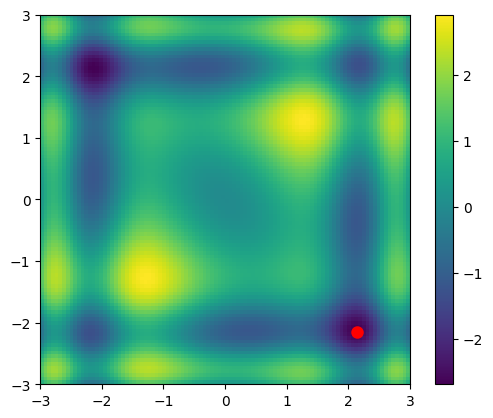

In [7]:
# define the grid of inputs
x = np.linspace(-search_range_x1, search_range_x1, 100)
y = np.linspace(-search_range_x2, search_range_x2, 100)
xx, yy = np.meshgrid(x, y)
grid = np.vstack((xx.ravel(), yy.ravel())).T

# apply the objective function to each point in the grid
values = np.array([objective(point) for point in grid])

# reshape the output of the function evaluations into the same shape as the input grid
values = values.reshape(xx.shape)
        
plt.imshow(values, cmap='viridis', extent=[-search_range_x1, search_range_x1, -search_range_x2, search_range_x2], origin='lower')
plt.plot(*optimizer.get_best_position(), marker='o', markersize=7, markeredgewidth=2, color='red')
plt.colorbar()
plt.show()

### Compare with pyswarm library

In [8]:
from pyswarm import pso

def constraint_ps(x):
    return []# [-1 if x[0] * x[-1] > 0.9 else 0]

x0 = []

t0 = time.time()
x_opt, best_value_opt = pso(objective, min_x, max_x, x0, constraint_ps, minstep=1e-21, minfunc=1e-21)
print("time: ", time.time()-t0)
print('x =', x_opt[0])
print('y =', x_opt[1])
print('obj =', best_value_opt)

Stopping search: maximum iterations reached --> 100
time:  0.2752652168273926
x = -2.1461196246276515
y = 2.146119620540783
obj = -2.692604388680456
